Visit here for Dataset <a target="_blank" href="https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio">Kaggle Speech emotion dataset</a>

## **About Dataset**

### **Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)**


Speech audio-only files (16bit, 48kHz .wav) from the RAVDESS. Full dataset of speech and song, audio and video (24.8 GB) available from <a rel="noreferrer nofollow" target="_blank" href="https://zenodo.org/record/1188976">Zenodo</a>. Construction and perceptual validation of the RAVDESS is described in our Open Access <a rel="noreferrer nofollow" target="_blank" href="https://doi.org/10.1371/journal.pone.0196391">paper in PLoS ONE</a>.

Check out the <a target="_blank" href="https://www.kaggle.com/uwrfkaggler/ravdess-emotional-song-audio">Kaggle Song emotion dataset</a>.


#### **Files**

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.


#### **File naming convention**


Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

*Filename identifiers*

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

* Vocal channel (01 = speech, 02 = song).

* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

* Repetition (01 = 1st repetition, 02 = 2nd repetition).

* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


**Filename example:** 03-01-06-01-02-01-12.wav

* Audio-only (03)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12)
* Female, as the actor ID number is even.

### Step 0: Importing Data from Kaggle

In [1]:
!pip install kaggle

In [ ]:
# Here you need to read the "kaggle.json" downloaded from your account section on Kaggle --> `Account` >> `API` >> Click on, `Create New API Token`

# Referal link for complete tutorial on importing//downloading dataset from Kaggle --> https://buggyprogrammer.com/load-kaggle-dataset-in-colab-or-jupyter/

from google.colab import files
files.upload()

In [3]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 96% 412M/429M [00:02<00:00, 150MB/s]
100% 429M/429M [00:02<00:00, 173MB/s]


In [5]:
%%time

from zipfile import ZipFile

file_name = 'ravdess-emotional-speech-audio.zip' # the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done
CPU times: user 9.2 s, sys: 2.48 s, total: 11.7 s
Wall time: 17.9 s


## **Introduction on Audio data in Digital Form**

<img data-src="https://cdn.ttgtmedia.com/rms/onlineimages/longitudinal_vs_transverse_waves-f_mobile.png" class="" data-srcset="https://cdn.ttgtmedia.com/rms/onlineimages/longitudinal_vs_transverse_waves-f_mobile.png 960w,https://cdn.ttgtmedia.com/rms/onlineimages/longitudinal_vs_transverse_waves-f.png 1280w" alt="Longitudinal vs. transverse sound waves" height="490" width="560" src="https://cdn.ttgtmedia.com/rms/onlineimages/longitudinal_vs_transverse_waves-f_mobile.png" srcset="https://cdn.ttgtmedia.com/rms/onlineimages/longitudinal_vs_transverse_waves-f_mobile.png 960w,https://cdn.ttgtmedia.com/rms/onlineimages/longitudinal_vs_transverse_waves-f.png 1280w">

### ***Frequency (Hz)***

* Frequency describes the differences of wave lengths.
* We interperate frequency has high and low pitches.

<img decoding="async" src="https://images.ctfassets.net/4yflszkpcwkt/1NY19ekfNszZANHsDHKLb4/e99c0c6214959a251fa6f4dff99f8335/u11l2a2.gif" alt="waves">

### ***Intensity (db / power)***

* Intensity describes the amplitude (height) of the wave.

<img class="" src="https://s3-us-west-2.amazonaws.com/courses-images-archive-read-only/wp-content/uploads/sites/222/2014/12/20105352/Figure_18_03_01ab.jpg" alt="Na" width="290" height="272">

### ***Sample Rate***

* Sample rate is specific to how the computer reads in the audio file.
* Think of it as the "resolution" of the audio.

<img src="https://cdn.shopify.com/s/files/1/1169/2482/files/Sampling_Rate_Cover_image.jpg?v=1654170259" alt="Sampling Rate">

## Reading in Audio Files

There are many types of audio files: `mp3`, `wav`, `m4a`, `flac`, `ogg`, etc.

## Step 1: Importing required modules

In [6]:
# to manage dataframe, array and visualizing the audio data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for file handling
import os
import sys
from glob import glob

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import librosa
import librosa.display

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

## Step 2: Data preprocessing steps & Visualization

### Creating Dataframe

In [7]:
ravdess = '/content/audio_speech_actors_01-24/'
ravdess_directory_list = os.listdir(ravdess)
ravdess_directory_list

['Actor_04',
 'Actor_10',
 'Actor_03',
 'Actor_13',
 'Actor_15',
 'Actor_23',
 'Actor_08',
 'Actor_24',
 'Actor_18',
 'Actor_14',
 'Actor_06',
 'Actor_16',
 'Actor_12',
 'Actor_07',
 'Actor_21',
 'Actor_19',
 'Actor_22',
 'Actor_09',
 'Actor_05',
 'Actor_02',
 'Actor_17',
 'Actor_11',
 'Actor_20',
 'Actor_01']

In [8]:
# Audio-only (03)
# Speech (01)
# Fearful (06)
# Normal intensity (01)
# Statement "dogs" (02)
# 1st Repetition (01)
# 12th Actor (12)
# Female, as the actor ID number is even.

path = []
audio_file_name = []
emotion = []
emotion_intensity = []
statement = []
repetition = []
actor_id = []

for id in ravdess_directory_list:
  p = ravdess + id
  # creating directory including actors_1-24
  actor = os.listdir(p)
  for file_name in actor:
    path.append(p + '/' + file_name)
    audio_file_name.append(file_name)
    part = file_name.split('.')[0].split('-')
    emotion.append(int(part[2]))
    emotion_intensity.append(int(part[3]))
    statement.append(int(part[4]))
    repetition.append(int(part[5]))
    actor_id.append(int(part[6]))

In [9]:
# Defining a dictionary containing whole data obtained from audio file name

data = {'file_path':path,
        'audio_file_name':audio_file_name,
        'emotion': emotion,
        'intensity': emotion_intensity,
        'statement': statement,
        'repetition':repetition,
        'actor_id': actor_id}

df = pd.DataFrame(data)
df.head(10)

,file_path,audio_file_name,emotion,intensity,statement,repetition,actor_id
0,/content/audio_speech_actors_01-24/Actor_04/03...,03-01-04-02-01-01-04.wav,4,2,1,1,4
1,/content/audio_speech_actors_01-24/Actor_04/03...,03-01-03-01-02-01-04.wav,3,1,2,1,4
2,/content/audio_speech_actors_01-24/Actor_04/03...,03-01-02-02-01-02-04.wav,2,2,1,2,4
3,/content/audio_speech_actors_01-24/Actor_04/03...,03-01-08-02-02-02-04.wav,8,2,2,2,4
4,/content/audio_speech_actors_01-24/Actor_04/03...,03-01-05-02-01-02-04.wav,5,2,1,2,4
5,/content/audio_speech_actors_01-24/Actor_04/03...,03-01-05-02-02-01-04.wav,5,2,2,1,4
6,/content/audio_speech_actors_01-24/Actor_04/03...,03-01-05-02-02-02-04.wav,5,2,2,2,4
7,/content/audio_speech_actors_01-24/Actor_04/03...,03-01-03-01-01-02-04.wav,3,1,1,2,4
8,/content/audio_speech_actors_01-24/Actor_04/03...,03-01-06-01-02-01-04.wav,6,1,2,1,4
9,/content/audio_speech_actors_01-24/Actor_04/03...,03-01-06-02-01-01-04.wav,6,2,1,1,4


In [10]:
!mkdir '/content/Dataset_file'

In [11]:
# Saving the dataset in CSV format
df.to_csv('/content/Dataset_file/speech_emotion_recognition.csv', index=False)

### Data Exploration

In [12]:
# shape of the dataset
df.shape

(1440, 7)

In [13]:
# checking columns & and its dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   file_path        1440 non-null   object
 1   audio_file_name  1440 non-null   object
 2   emotion          1440 non-null   int64 
 3   intensity        1440 non-null   int64 
 4   statement        1440 non-null   int64 
 5   repetition       1440 non-null   int64 
 6   actor_id         1440 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 78.9+ KB


In [14]:
# Sorting data as per actor_id

df = df.sort_values(by='actor_id').reset_index().copy()

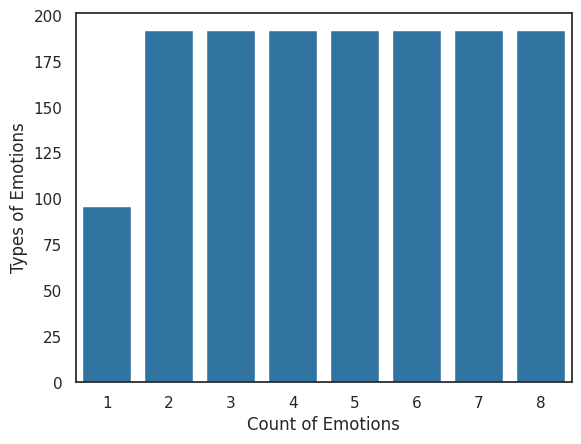

In [15]:
# Checking the total number of emotions
ax = sns.barplot(x=df['emotion'].value_counts().keys().to_list(), y=df['emotion'].value_counts().values)
ax.set_xlabel("Count of Emotions")
ax.set_ylabel("Types of Emotions")
plt.show()

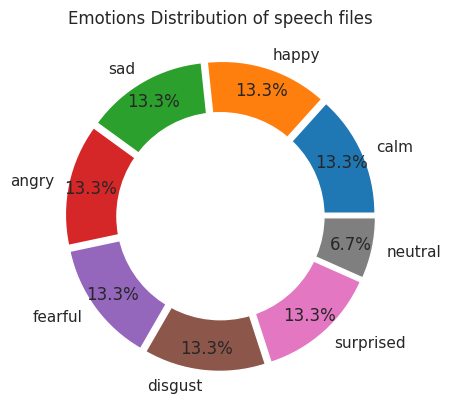

In [16]:
# Plotting scatter plot comparing repetition

label = ['calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised','neutral']

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(df['emotion'].value_counts().values, labels=label,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Emotions Distribution of speech files')

# Displaying Chart
plt.show()

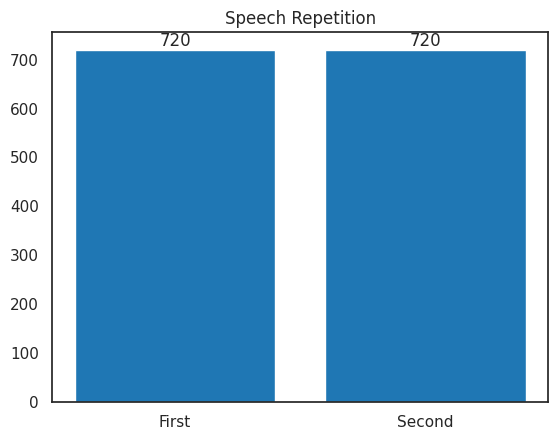

In [17]:
# setting column dtype to str
df['repetition'] = df['repetition'].astype(str)

# plotting bar plot
fig, ax = plt.subplots()

p = ax.bar(df['repetition'].value_counts().keys(), df['repetition'].value_counts().values, tick_label=['First', 'Second'])
ax.bar_label(p, label_type='edge')
ax.set_title("Speech Repetition")
plt.show()

In [18]:
df.drop(labels='index', axis=1, inplace=True)
df.head()

,file_path,audio_file_name,emotion,intensity,statement,repetition,actor_id
0,/content/audio_speech_actors_01-24/Actor_01/03...,03-01-06-01-01-02-01.wav,6,1,1,2,1
1,/content/audio_speech_actors_01-24/Actor_01/03...,03-01-03-01-01-02-01.wav,3,1,1,2,1
2,/content/audio_speech_actors_01-24/Actor_01/03...,03-01-08-01-02-01-01.wav,8,1,2,1,1
3,/content/audio_speech_actors_01-24/Actor_01/03...,03-01-07-02-01-01-01.wav,7,2,1,1,1
4,/content/audio_speech_actors_01-24/Actor_01/03...,03-01-05-02-01-01-01.wav,5,2,1,1,1


### Reading in Audio Files

There are many types of audio files extensions: `mp3`, `wav`, `m4a`, `flac`, `ogg`.

In [19]:
audio_f = df['file_path']
audio_f[0]

'/content/audio_speech_actors_01-24/Actor_01/03-01-06-01-01-02-01.wav'

In [20]:
# play audio file
ipd.Audio(audio_f[0])

In [21]:
# reading audio data using librosa
y, sr = librosa.load(audio_f[0])

In [31]:
print(f"Shape of the audio files array: {y.shape}\n")
print(f"First 10 enteries in the audio files array: \n\n{y[:11]}\n")
print(f"Sample Rate: {sr}")

Shape of the audio files array: (80196,)

First 10 enteries in the audio files array: 

[9.3495750e-05 1.6403565e-04 1.1930163e-04 8.6123269e-05 8.1416212e-05
 1.0464333e-04 9.7889642e-05 8.3327359e-05 4.9454495e-05 2.5507601e-05
 1.1075070e-05]

Sample Rate: 22050


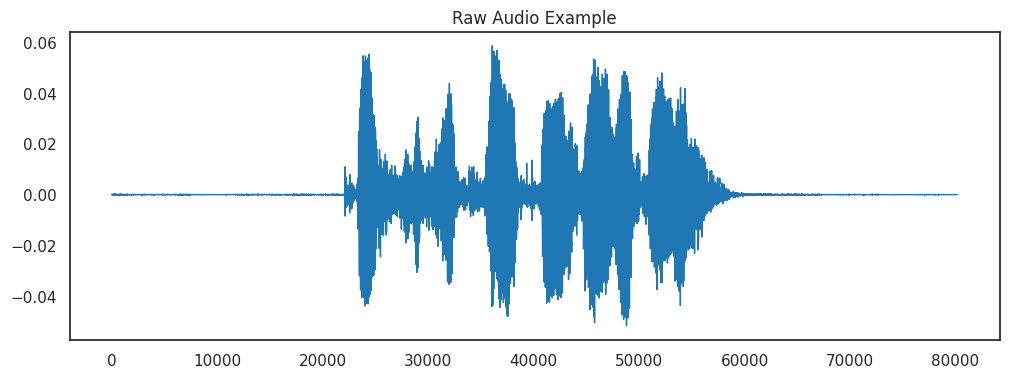

In [28]:
# Plotting the audio data
pd.Series(y).plot(figsize=(12, 4),lw=1, title='Raw Audio Example');

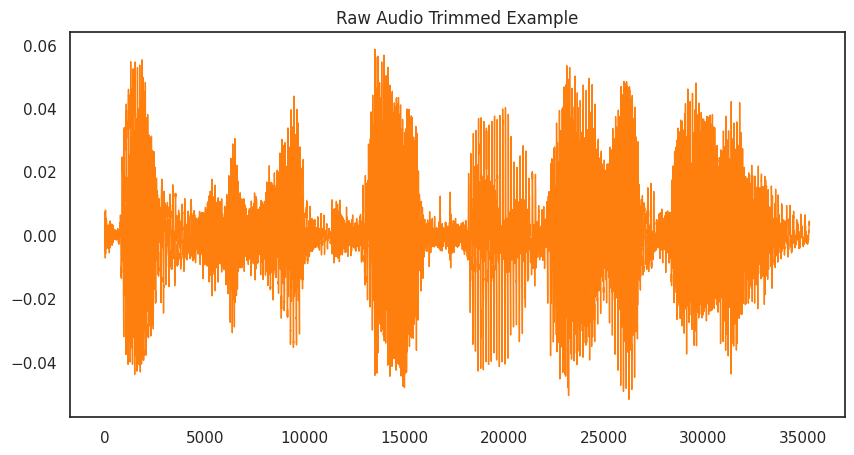

In [32]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10,5),
                          lw=1,
                          title="Raw Audio Trimmed Example",
                          color=color_pal[1])
plt.show()

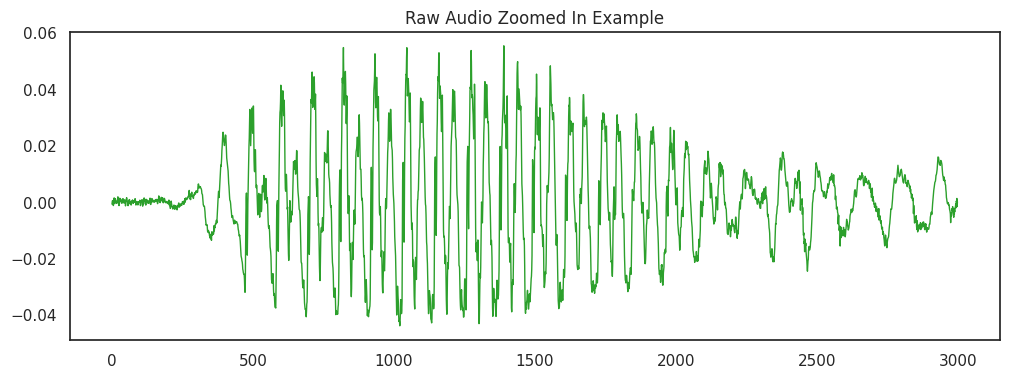

In [34]:
# Vizualizing the certain part of the Audio Data
pd.Series(y[23000:26000]).plot(figsize=(12, 4),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                  color=color_pal[2])
Plt.show()

### Spectrogram

Spectrograms of audio can be used to identify spoken words phonetically, and to analyse the various calls of animals. A spectrogram can be generated by an optical spectrometer, a bank of band-pass filters, by Fourier transform or by a wavelet transform (`In which case it is also known as a scaleogram or scalogram`).

In [35]:
# Applying Fourier Transformation on the audio data
ft = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(ft), ref=np.max)
S_db.shape

(1025, 157)

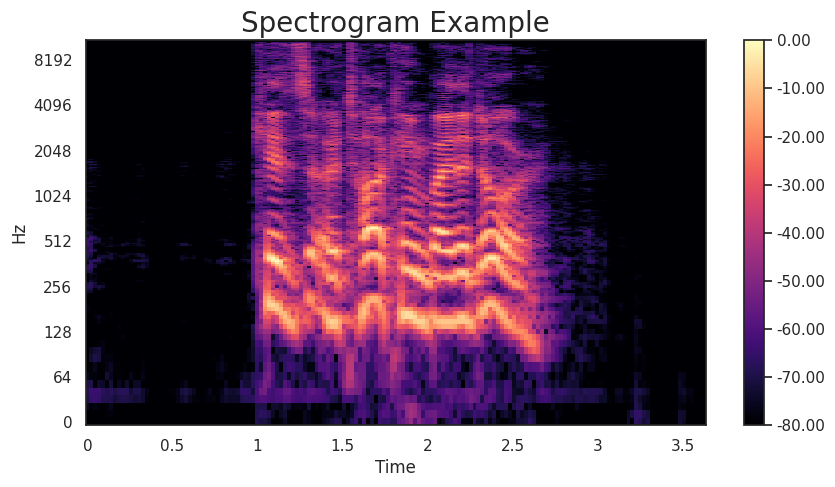

In [40]:
# Plotting the transformed data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Spectrogram Example',
             fontsize=20)
fig.colorbar(img, ax=ax, format=f"%0.2f")
plt.show()

###  Mel Spectrogram

The Mel spectrogram is used to provide our models with sound information similar to what a human would perceive. The raw audio waveforms are passed through filter banks to obtain the Mel spectrogram. After this process, each sample has a shape of 128 x 128, indicating 128 filter banks used and 128 time steps per clip.

In [43]:
m_spec = librosa.feature.melspectrogram(y=y,
                                        sr=sr,
                                        n_mels=128*2,)
S_db_mel = librosa.amplitude_to_db(m_spec, ref=np.max)

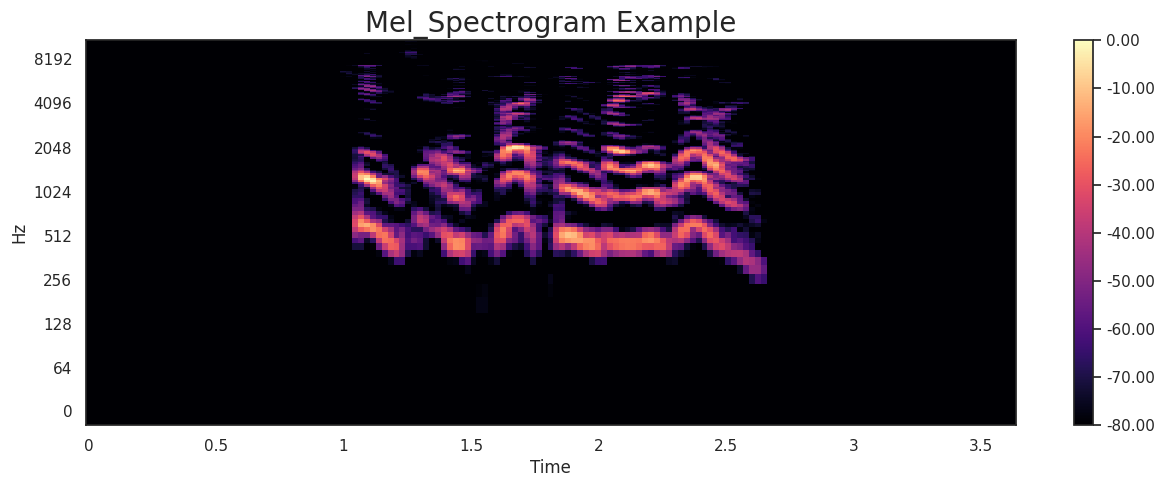

In [44]:
# Plotting the transformed data
fig, ax = plt.subplots(figsize=(15,5))
img = librosa.display.specshow(S_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Mel_Spectrogram Example',
             fontsize=20)
fig.colorbar(img, ax=ax, format=f"%0.2f")
plt.show()